In [32]:
import numpy as np, curvedsky, prjlib, plottools as pl, binning as bn, healpy as hp
from matplotlib.pyplot import *

In [33]:
p = prjlib.init_analysis(wtype='Lmask',ascale=1.0)
t = prjlib.init_analysis(wtype='Lmask',ascale=1.0,tval=1.0)
q = prjlib.init_analysis(wtype='Lmask',fltr='cinv')

## CMB spectra

In [34]:
l, rcl0 = np.loadtxt(p.fcmb.ocl,unpack=True,usecols=(0,1))
l, scl0, ncl0, ocl0, vcl0 = np.loadtxt(p.fcmb.scl,unpack=True,usecols=(0,1,2,4,8))
l, rcl2 = np.loadtxt(t.fcmb.ocl,unpack=True,usecols=(0,1))
l, scl2, ncl2, ocl2, vcl2 = np.loadtxt(t.fcmb.scl,unpack=True,usecols=(0,1,2,4,8))

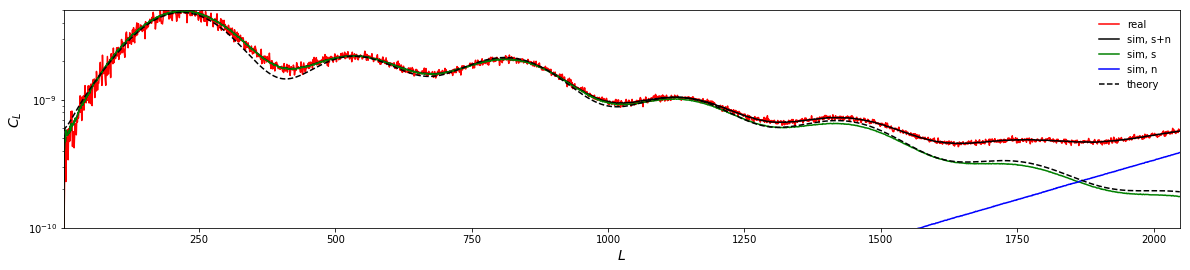

In [35]:
pl.plot_1dstyle(fsize=[20,4],ymin=1e-10,ymax=5e-9,xmin=2,ylog=True,xmax=2048)
plot(l,l**2*rcl0,'r-',label='real')
plot(l,l**2*ocl0,'k-',label='sim, s+n')
plot(l,l**2*scl0,'g',label='sim, s')
plot(l,l**2*ncl0,'b',label='sim, n')
plot(p.l,p.l**2*p.lcl[0,:],'k--',label='theory')
legend()

In [36]:
l, rcl1 = np.loadtxt(q.fcmb.ocl,unpack=True,usecols=(0,1))
l, ocl1, vcl1 = np.loadtxt(q.fcmb.scl,unpack=True,usecols=(0,4,8))
l, xcl1 = np.loadtxt(q.fcmb.xcl,unpack=True,usecols=(0,1))

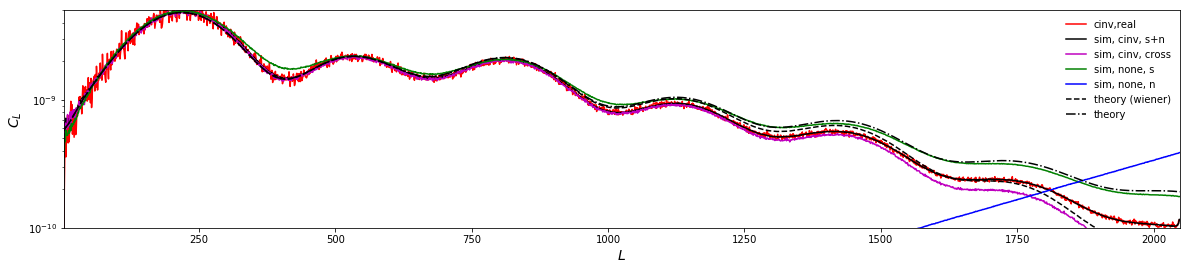

In [37]:
pl.plot_1dstyle(fsize=[20,4],ymin=1e-10,ymax=5e-9,xmin=2,ylog=True,xmax=2048)
plot(l,l**2*rcl1,'r',label='cinv,real')
plot(l,l**2*ocl1,'k',label='sim, cinv, s+n')
plot(l,l**2*xcl1,'m',label='sim, cinv, cross')
plot(l,l**2*scl0,'g',label='sim, none, s')
plot(l,l**2*ncl0,'b',label='sim, none, n')
plot(p.l,p.l**2*p.lcl[0,:]**2/(p.lcl[0,:]+ncl0),'k--',label='theory (wiener)')
plot(p.l,p.l**2*p.lcl[0,:],'k-.',label='theory')
legend()

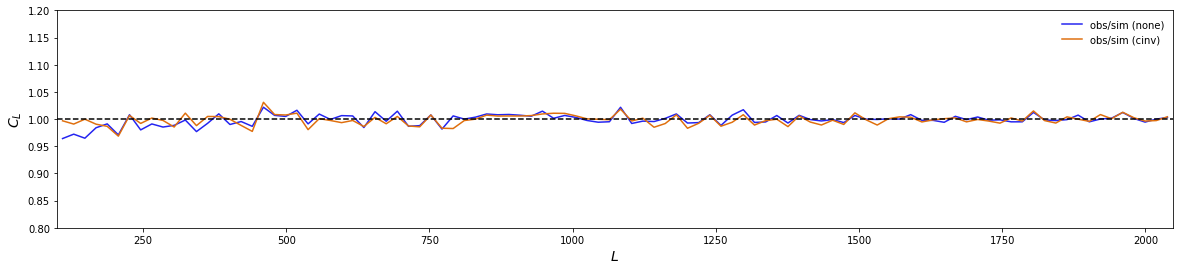

In [38]:
pl.plot_1dstyle(fsize=[20,4],ymin=.8,ymax=1.2,xmin=100,xmax=2048)
mb = bn.multipole_binning(100,lmin=100,lmax=2048)
rcb0 = bn.binning(rcl0,mb)
rcb1 = bn.binning(rcl1,mb)
ocb0 = bn.binning(ocl0,mb)
ocb1 = bn.binning(ocl1,mb)
plot(mb.bc,rcb0/ocb0,label='obs/sim (none)')
plot(mb.bc,rcb1/ocb1,label='obs/sim (cinv)')
axhline(1,ls='--',color='k')
legend()

Gaussianity

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


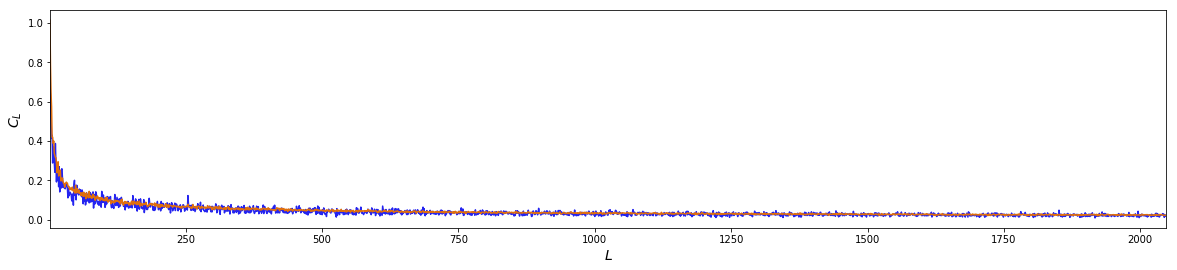

In [8]:
pl.plot_1dstyle(fsize=[20,4],xmin=2,xmax=2048)
plot(l,vcl0/ocl0)
plot(l,vcl1/ocl1)

## Beam

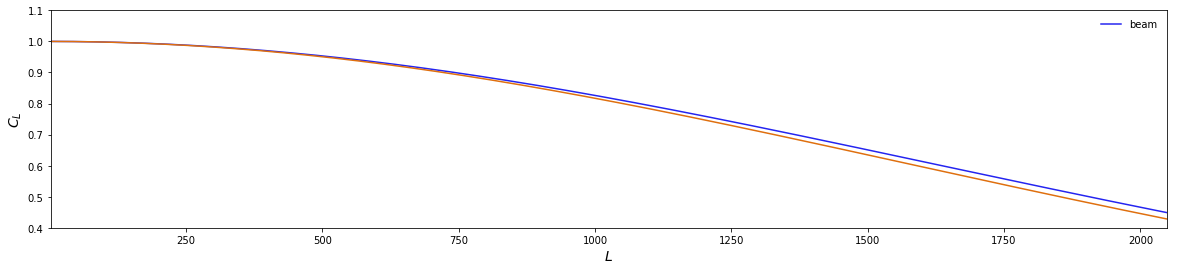

In [30]:
def beam():
    pl.plot_1dstyle(fsize=[20,4],ymin=.4,ymax=1.1,xmin=2,xmax=2048)
    bl = np.loadtxt(p.fbeam)[:p.lmax+1]
    pix = hp.sphtfunc.pixwin(2048)[:2049]
    l = np.linspace(0,2048,2049)
    plot(l,bl,label='beam')
    plot(l,pix*np.exp(-l*(l+1)*(np.pi*5./10800.)**2/(16.*np.log(2.))))
    legend()
beam()

## Pixel function

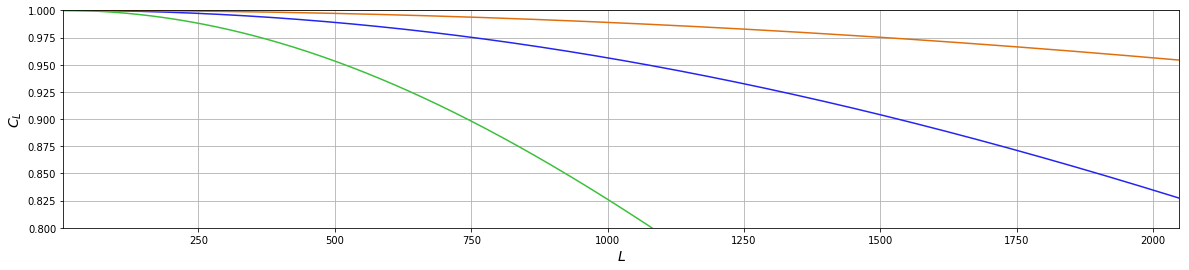

In [26]:
def pixfunc():
    pl.plot_1dstyle(fsize=[20,4],ymin=.8,ymax=1,xmin=2,xmax=2048,grid=True)
    pf1024 = hp.sphtfunc.pixwin(1024)[:2049]
    pf2048 = hp.sphtfunc.pixwin(2048)[:2049]
    plot(pf1024)
    plot(pf2048)
pixfunc()

## Approximate noise level

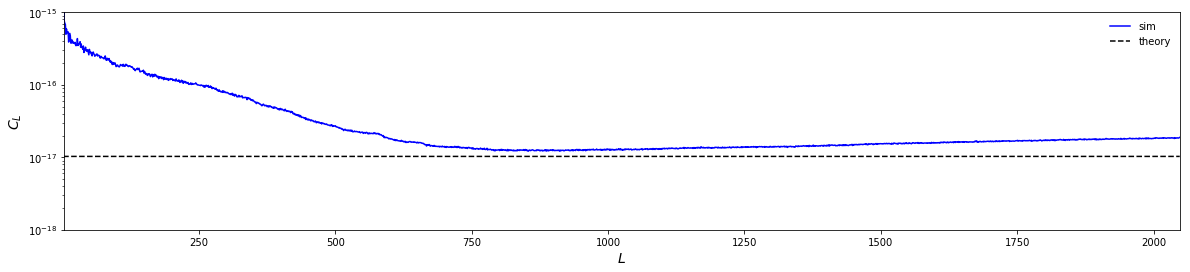

In [11]:
bl = np.loadtxt(p.fbeam)[:p.lmax+1]
nlev = (30.*np.pi/10800./2.72e6)**2
l, ncl = np.loadtxt(r.fcmb.scl,unpack=True,usecols=(0,2))
pl.plot_1dstyle(fsize=[20,4],ymin=1e-18,ymax=1e-15,xmin=2,ylog=True,xmax=2048)
plot(l,ncl*bl**2,'b',label='sim')
plot(p.l,np.ones(p.lmax+1)*nlev,'k--',label='theory')
legend()

## Point source spectrum

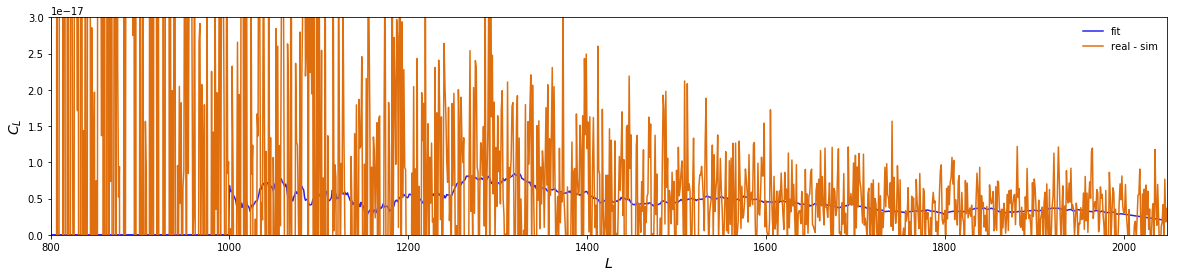

In [39]:
def ptsr_fit():
    pl.plot_1dstyle(fsize=[20,4],ymin=1e-30,ymax=3e-17,xmin=800,xmax=2048)
    l, dcl, dCL = np.loadtxt(p.fptsrcl,unpack=True)
    plot(l,dcl,label='fit')
    plot(l,dCL,label='real - sim')
    legend()
ptsr_fit()

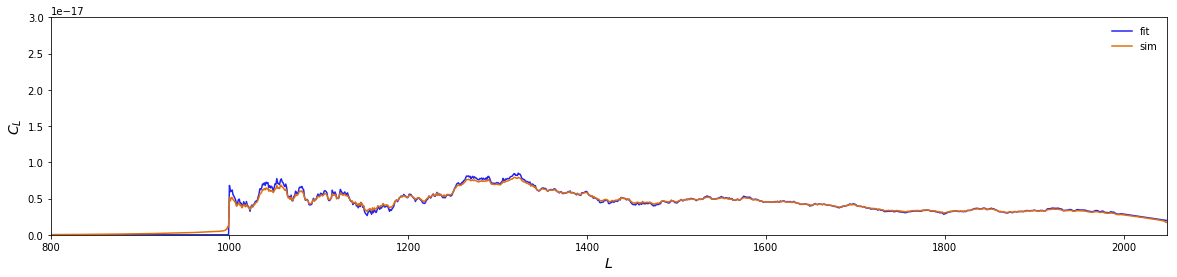

In [40]:
def ptsr_sim():
    pl.plot_1dstyle(fsize=[20,4],ymin=1e-30,ymax=3e-17,xmin=800,xmax=2048)
    l, dcl = np.loadtxt(p.fptsrcl,unpack=True,usecols=(0,1))
    l, cpp = np.loadtxt(p.fcmb.scl,unpack=True,usecols=(0,3))
    plot(l,dcl,label='fit')
    plot(l,cpp,label='sim')
    legend()
ptsr_sim()

## Filter

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


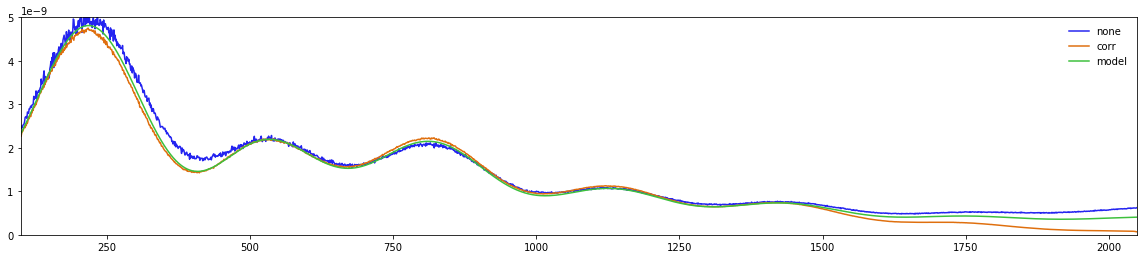

In [14]:
xlim(100,2048)
ylim(0,5e-9)
obs = p.lcl[0,:] + nlev/bl**2
Fl = ocl1/p.lcl[0,:]**2
Ql = Fl*obs
#alpha = xcl1/p.lcl[0,:]
ocl = ocl1/Ql**2
plot(l,l**2*ocl0,label='none')
plot(l,l**2*ocl,label='corr')
plot(l,l**2*obs,label='model')
legend()

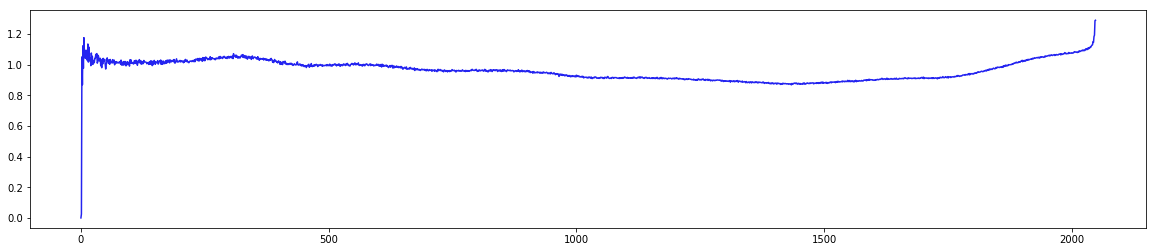

In [15]:
plot(Ql)